## Build the linear regression model using scikit learn in boston data to predict'Price' based on other dependent variable.

In [136]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston

In [189]:
load_boston() # looking on what an all data entry given.

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [190]:
boston=load_boston()

In [191]:
bos = pd.DataFrame(boston.data,columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT'])

In [192]:
bos["Target"]=boston.target

In [193]:
bos.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [194]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Target     0
dtype: int64

In [195]:
#saperating dependent and independent columns

y = bos["Target"]
X = bos.drop(columns = ["Target"])
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Target, Length: 506, dtype: float64

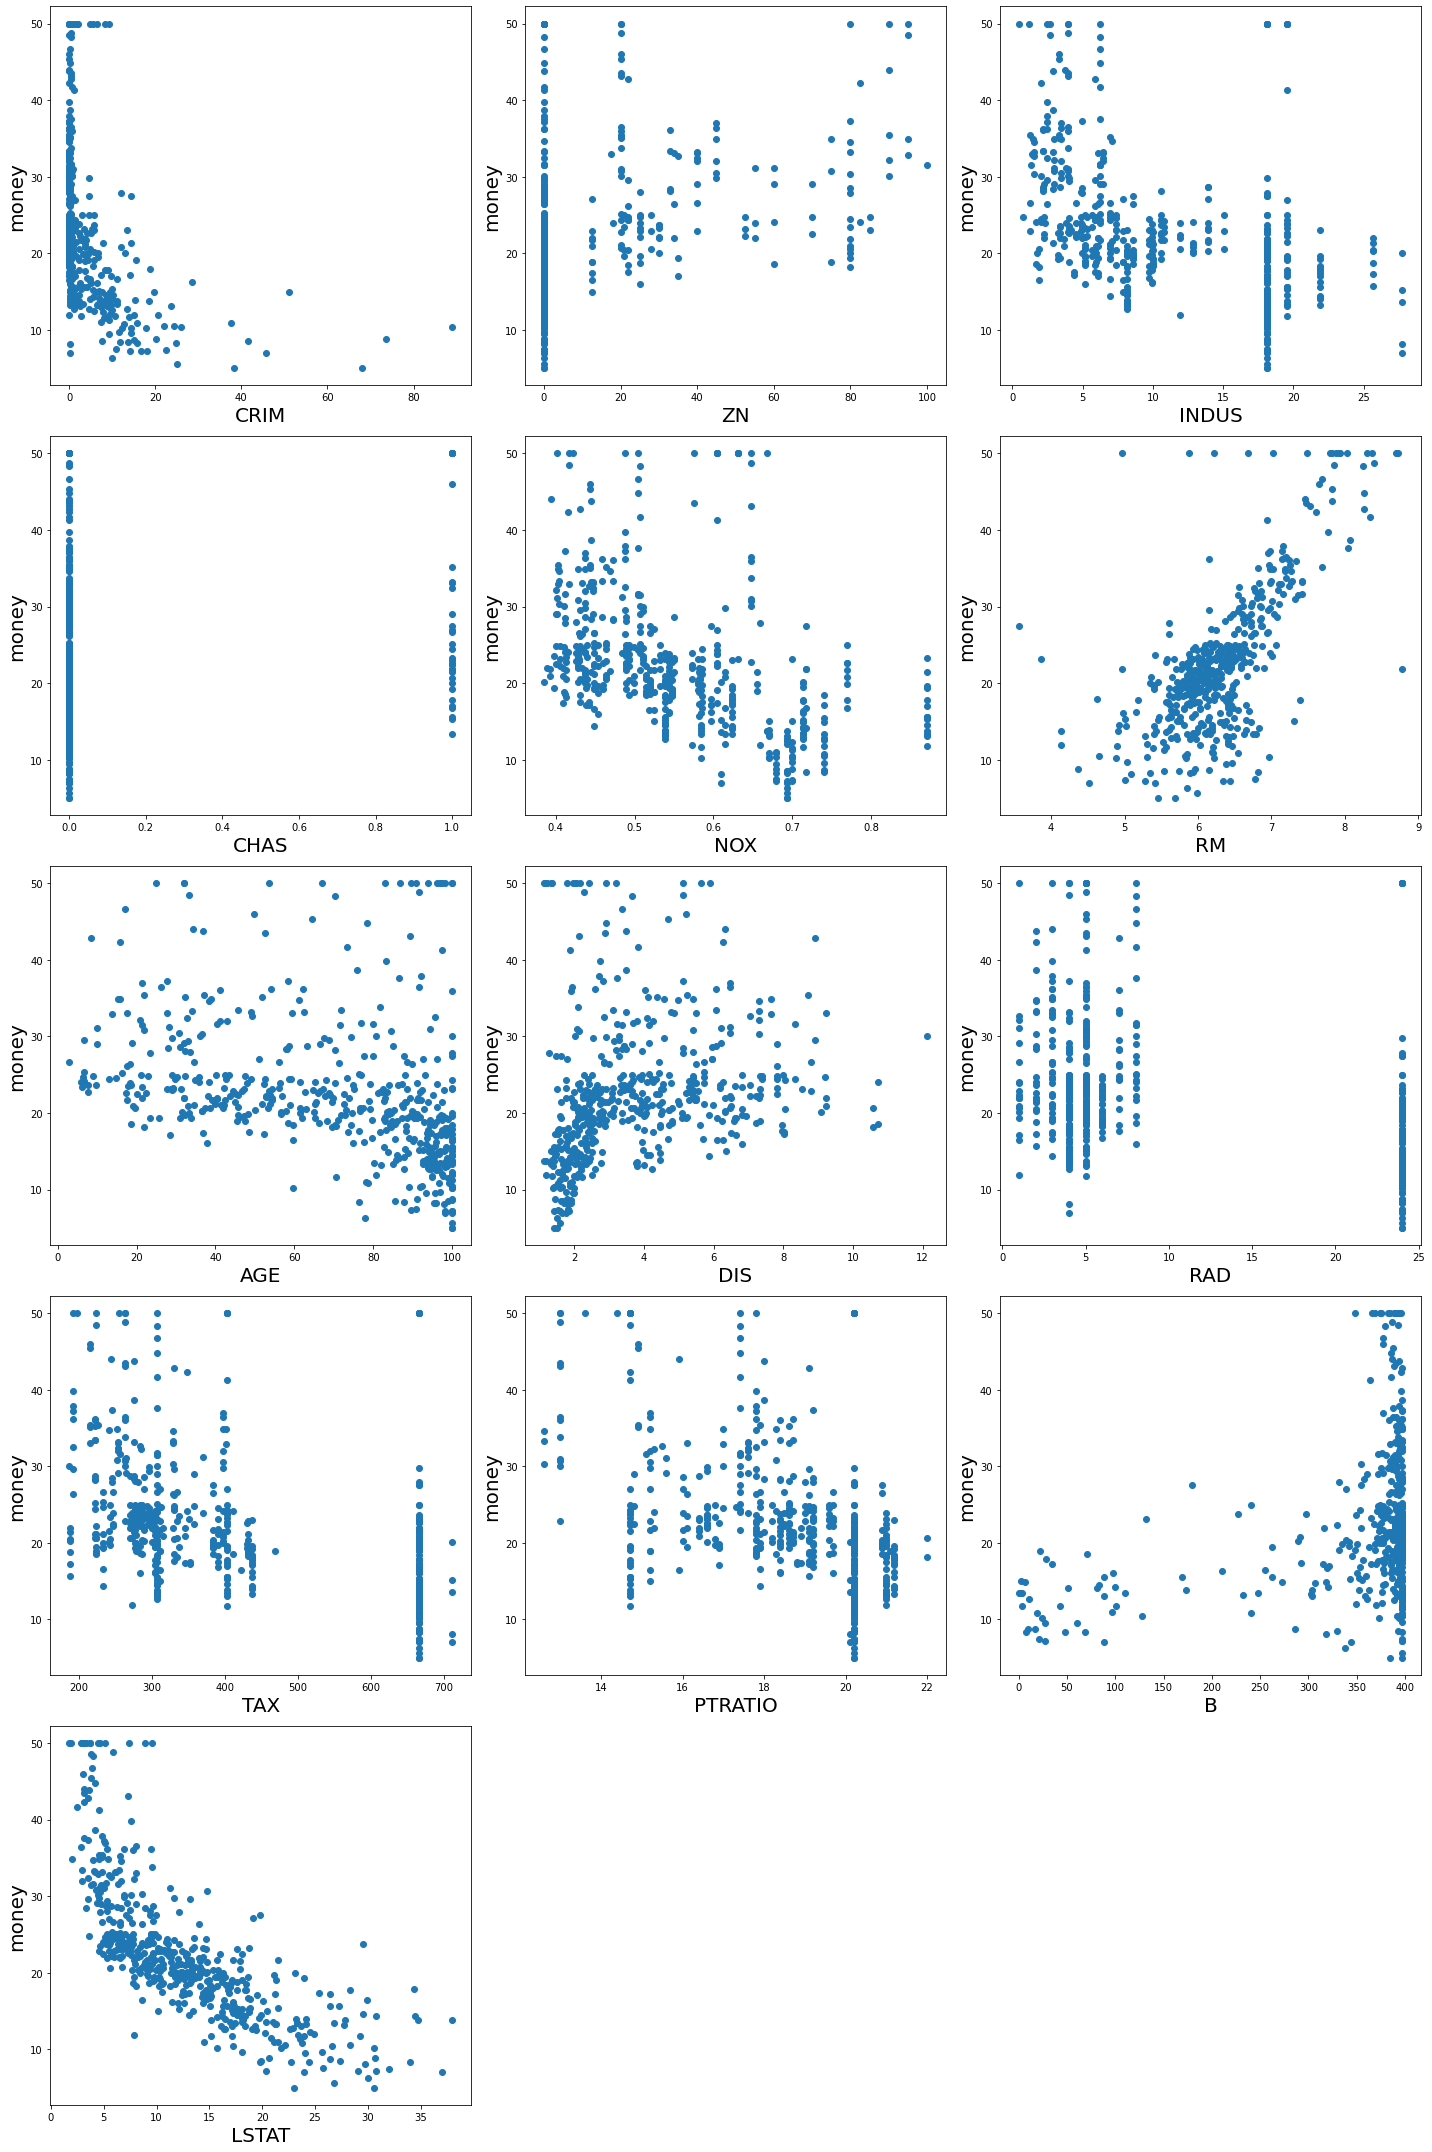

In [196]:
#ploting scatter plot of each independent column vs dependent column to see the relation among them.

plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('money',fontsize=20)
    plotnumber+=1
plt.tight_layout()

C:\Users\Akshay Gondaliya\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


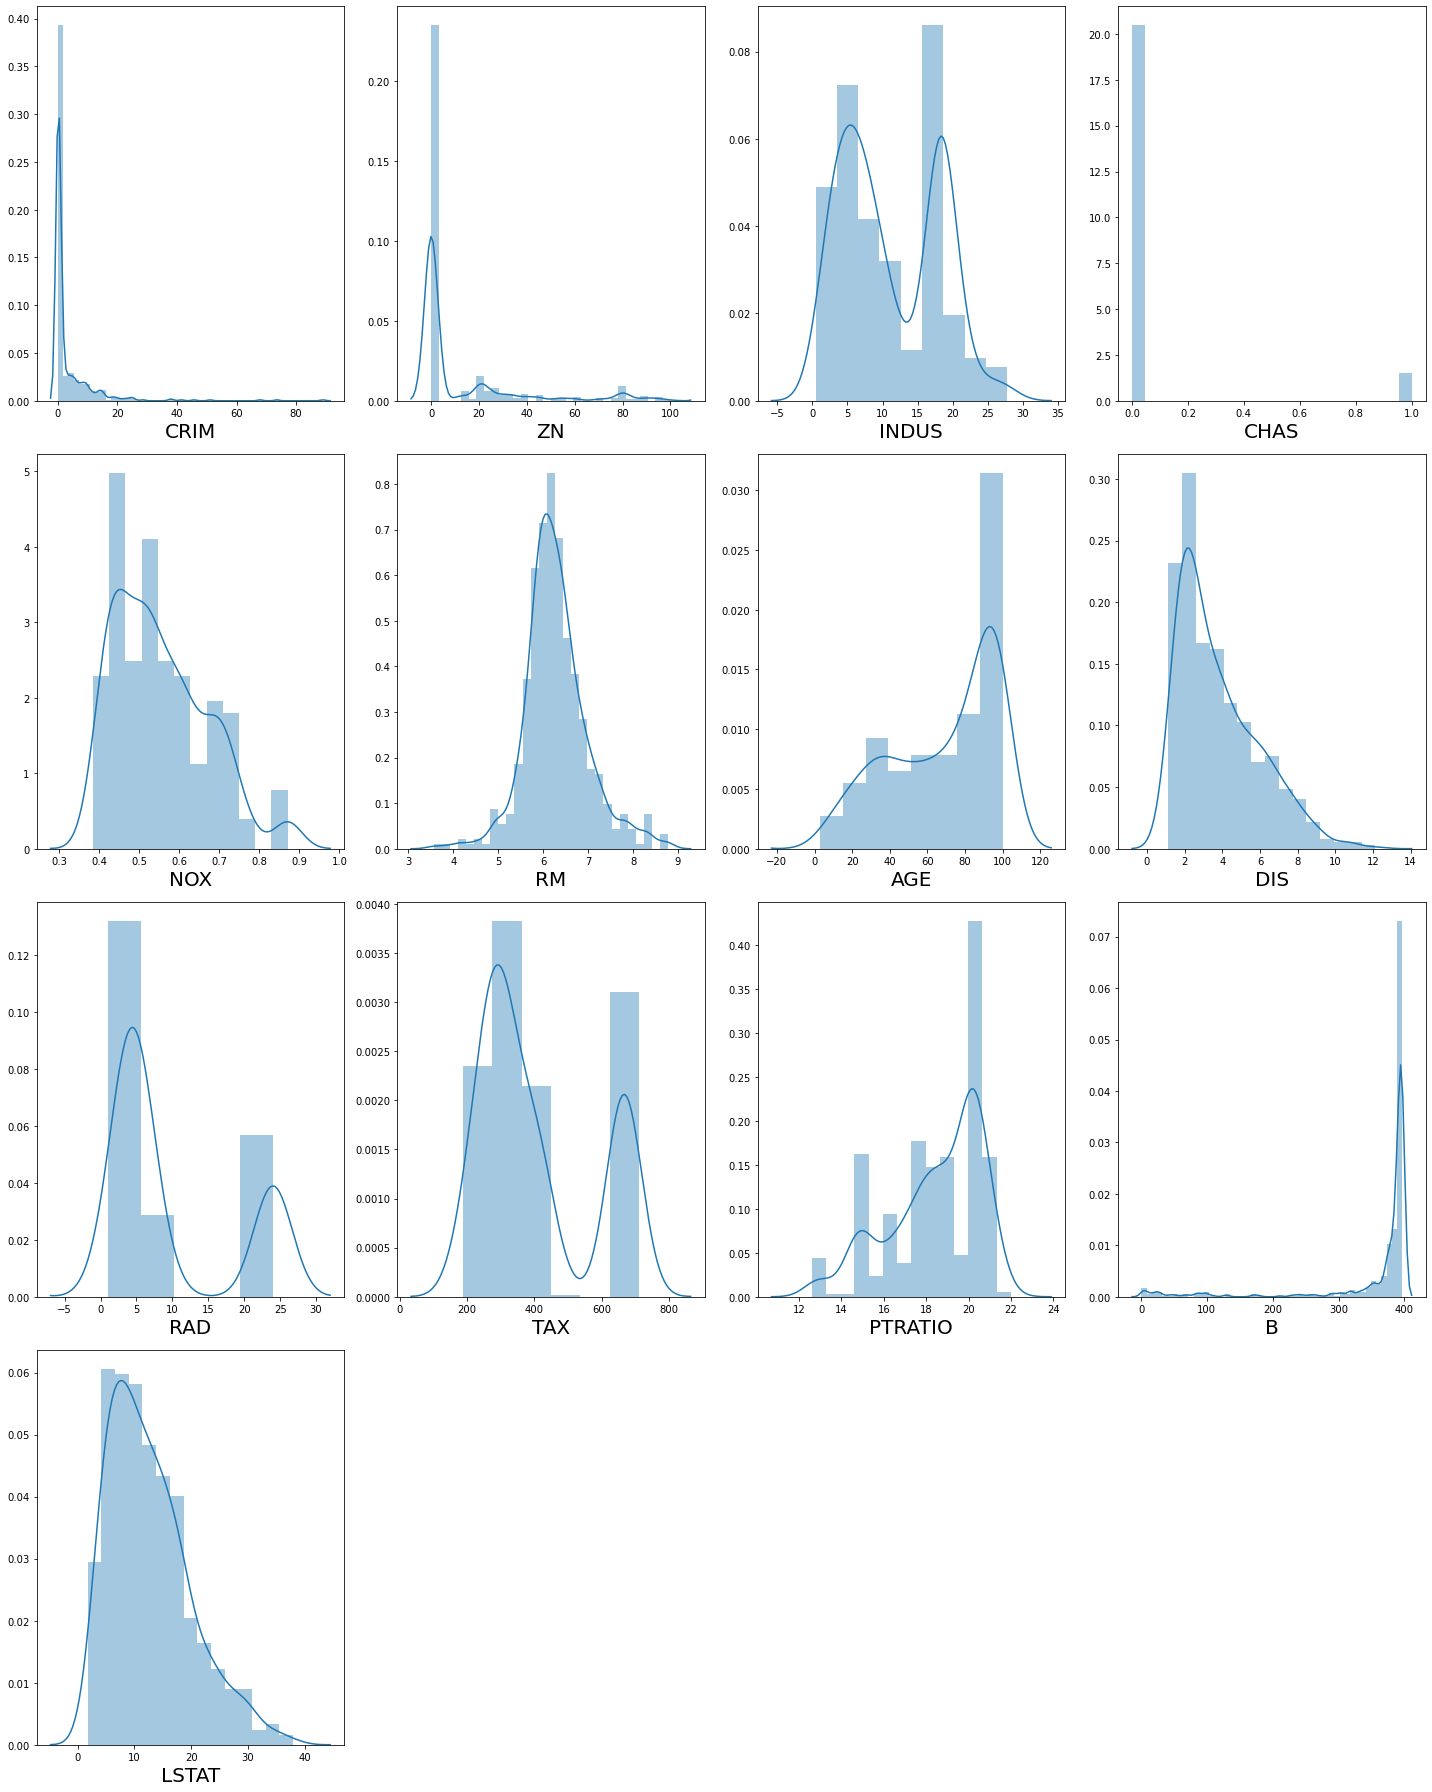

In [197]:
#ploting a distplot to see, how invidual feature is distributed.

import seaborn as sns
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

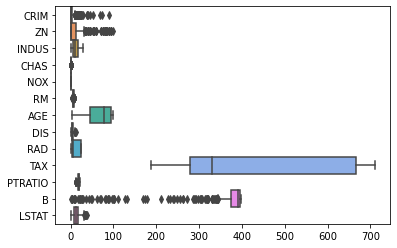

In [198]:
#ploting boxplot for outlier detection
sns.boxplot(data=X,orient="h",width=1)

## handling outliers

In [199]:


lower=X["CRIM"].quantile(0.25) #finding 25% quantile and 75% for calculate inter quantile range
upper=X["CRIM"].quantile(0.75)

iqr=upper-lower

upper_boundry=X["CRIM"].mean()+3*iqr  #finding upper boundry (because graph of "CRIM" is right squid )so that we can easily remove outliers

upper_boundry

X.loc[X["CRIM"]>upper_boundry,'CRIM']=upper_boundry #swaping the value of outyliers by upper boundry

In [200]:
lower=X["ZN"].quantile(0.25)
upper=X["ZN"].quantile(0.75)

iqr=upper-lower

upper_boundry=X["ZN"].mean()+3*iqr #finding upper boundry (because graph of "ZN" is right squid )so that we can easily remove outliers

upper_boundry

X.loc[X["ZN"]>upper_boundry,'ZN']=upper_boundry

In [201]:
lower=X["B"].quantile(0.25)
upper=X["B"].quantile(0.75)

iqr=upper-lower

lower_boundry=X["B"].mean()-iqr #finding lower boundry (because graph of "B" is left squid )so that we can easily remove outliers

lower_boundry

X.loc[X["B"]<lower_boundry,'B']=lower_boundry

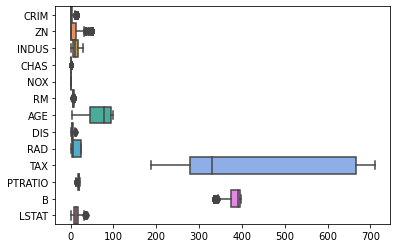

In [202]:
#after handling outliers lokking on boxplot 

sns.boxplot(data=X,orient="h",width=1)

C:\Users\Akshay Gondaliya\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


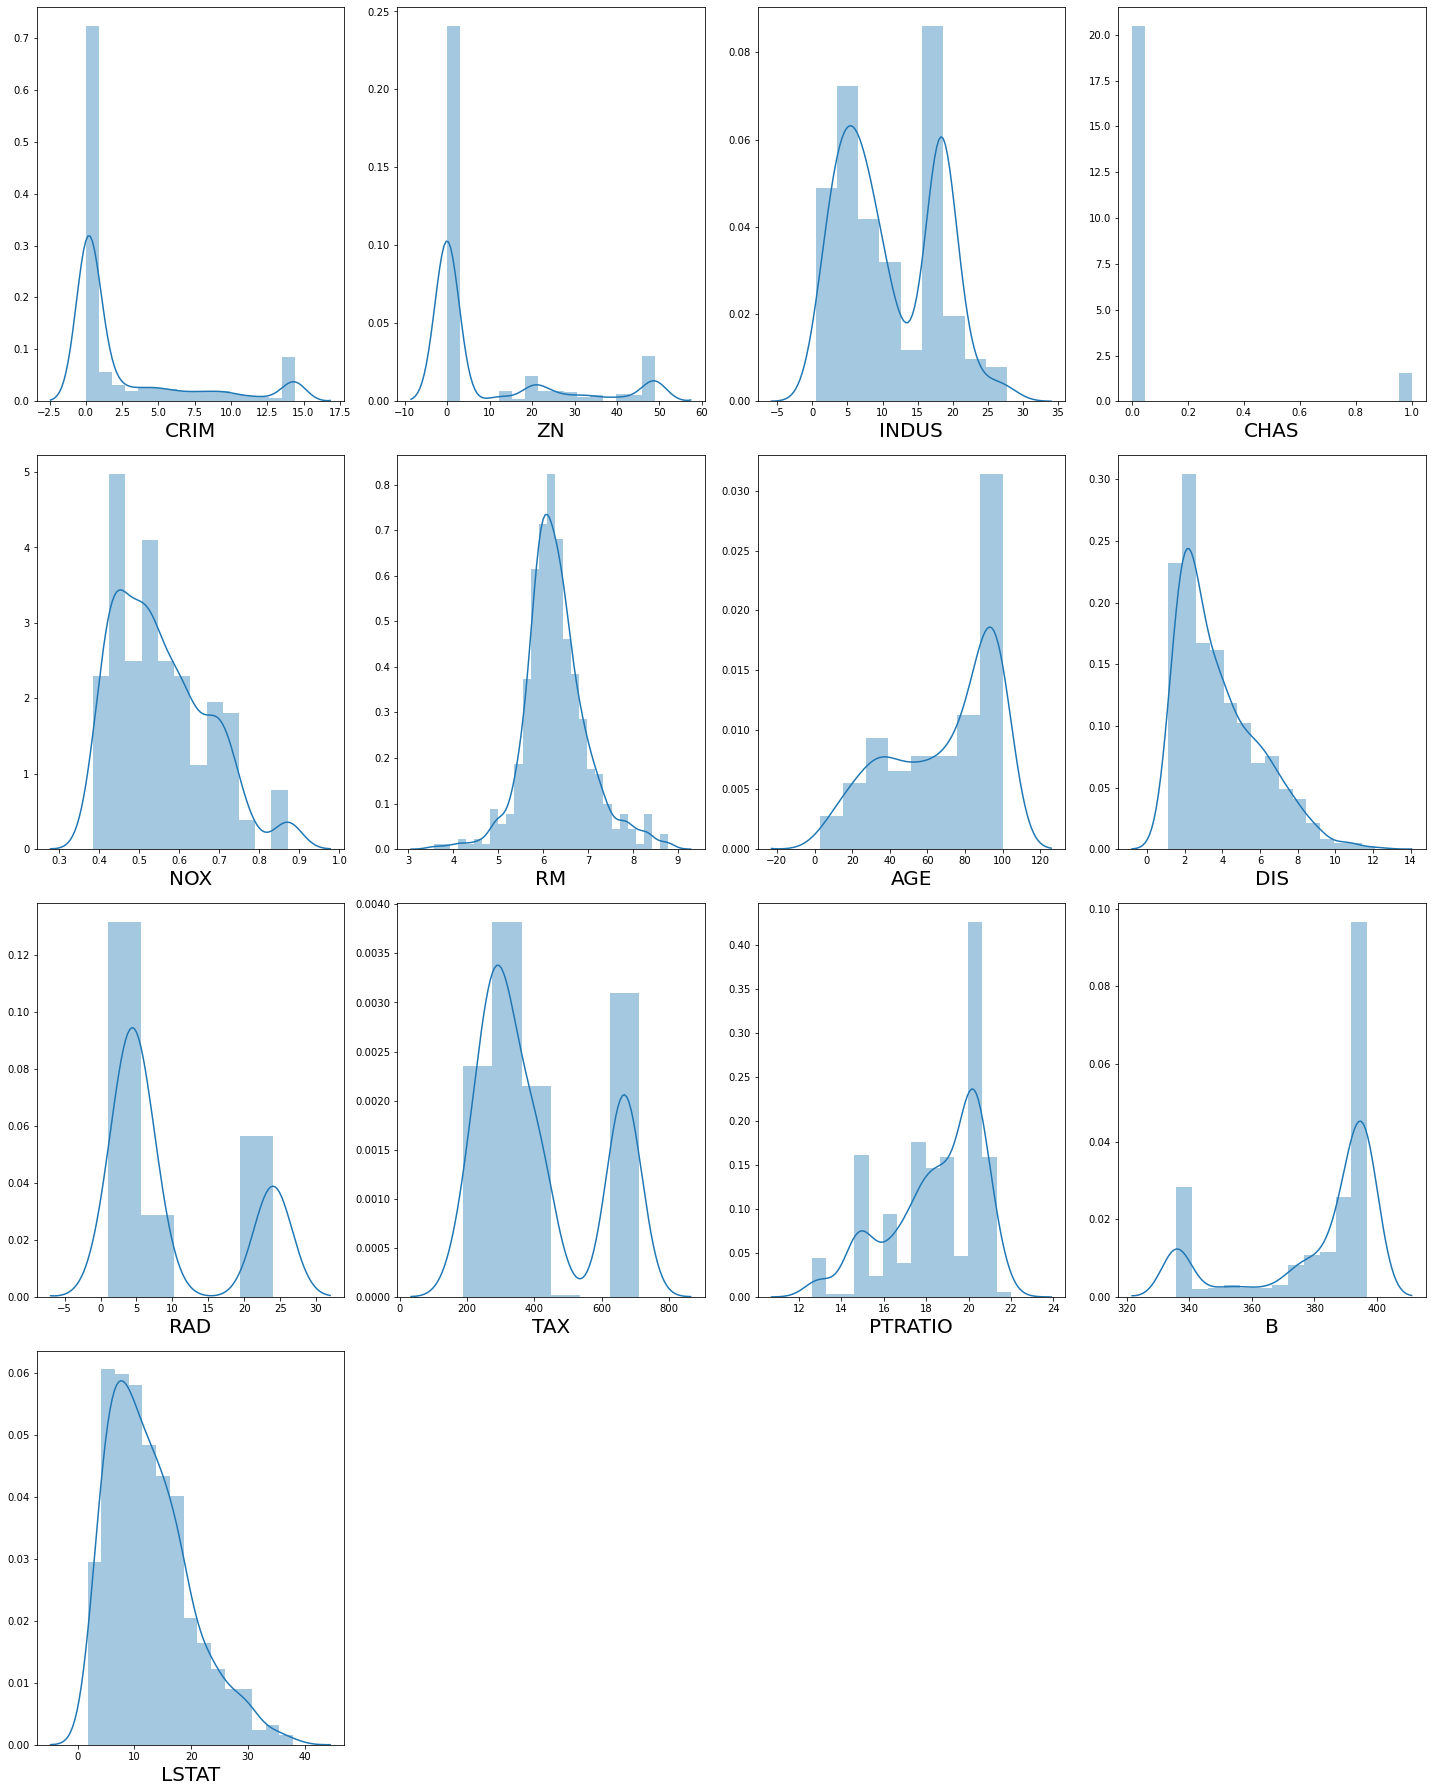

In [203]:
#after handling outliers lokking on distplot


plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Data Scalling

In [206]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.60904969,  0.56186378, -1.2879095 , ..., -1.45900038,
         0.7534601 , -1.0755623 ],
       [-0.60433446, -0.54541834, -0.59338101, ..., -0.30309415,
         0.7534601 , -0.49243937],
       [-0.60433895, -0.54541834, -0.59338101, ..., -0.30309415,
         0.56382603, -1.2087274 ],
       ...,
       [-0.5968202 , -0.54541834,  0.11573841, ...,  1.17646583,
         0.7534601 , -0.98304761],
       [-0.58585095, -0.54541834,  0.11573841, ...,  1.17646583,
         0.59271378, -0.86530163],
       [-0.59981916, -0.54541834,  0.11573841, ...,  1.17646583,
         0.7534601 , -0.66905833]])

In [ ]:
#df1=pd.DataFrame(data=X_scaled,columns=X.columns)

In [219]:
#df1.boxplot(figsize=(30,30))

## Train Test Split 

In [210]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.20,shuffle=True,random_state=40)

In [211]:
x_train.shape

(404, 13)

In [212]:
x_test.shape

(102, 13)

## Model building

In [218]:
# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

22.24561400657583
[-1.07084943  0.62345844 -0.17253837  0.70572699 -1.88708273  2.83524384
 -0.1212672  -2.646272    2.49094717 -1.87960685 -1.93877344 -0.19801927
 -3.84556033]


In [216]:
lm.score(x_test,y_test)

0.6789206887001948

In [217]:
lm.score(x_train,y_train)

0.7403023773361194